## Solución Practica

#### Objetivo: Predecir el precio del airbnb a partir del dataset proporcionado.

In [2]:
import sys  
sys.path.insert(1, "C:/Users/ASUS/Documents/GitHub/Machine-Learning-101")

In [3]:
from utils import plot_decision_boundary, poly_linear_regression, CM_BRIGHT

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 

## 1. Carga de datos y división train/test

In [5]:
from sklearn.model_selection import train_test_split

airbnb_data = pd.read_csv("./airbnb-listings-extract.csv", delimiter=";")
train, test = train_test_split(airbnb_data, test_size=0.3, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

# Guardar datos por separado
train.to_csv('./airbnb-listings_train.csv', sep=';', decimal='.', index=False)
test.to_csv('./airbnb-listings_test.csv', sep=';', decimal='.', index=False)

# Cargar el dataset de train
airbnb_train_data = pd.read_csv('./airbnb-listings_train.csv', sep=';', decimal='.')

Dimensiones del dataset de training: (10346, 89)
Dimensiones del dataset de test: (4434, 89)


In [6]:
# Cargar el dataset de train
airbnb_train_data = pd.read_csv('./airbnb-listings_train.csv', sep=';', decimal='.')

## 2. Análisis exploratorio

### 2.1 Revisar la estructura de los datos:

In [8]:
# Revisar las primeras filas y su contenido
train_head = airbnb_train_data.head()
train_info = airbnb_train_data.info()
train_describe = airbnb_train_data.describe(include='all')

train_head
# , train_info, train_describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10346 entries, 0 to 10345
Data columns (total 89 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              10346 non-null  int64  
 1   Listing Url                     10346 non-null  object 
 2   Scrape ID                       10346 non-null  int64  
 3   Last Scraped                    10346 non-null  object 
 4   Name                            10345 non-null  object 
 5   Summary                         9922 non-null   object 
 6   Space                           7619 non-null   object 
 7   Description                     10340 non-null  object 
 8   Experiences Offered             10346 non-null  object 
 9   Neighborhood Overview           6397 non-null   object 
 10  Notes                           3960 non-null   object 
 11  Transit                         6327 non-null   object 
 12  Access                          

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,2156319,https://www.airbnb.com/rooms/2156319,20170407214119,2017-04-08,GRANT VII Plaza Mayor,NaN,Beautiful and charming apartment recently deco...,Beautiful and charming apartment recently deco...,none,NaN,...,9.0,10.0,9.0,NaN,NaN,strict,40.0,0.24,"40.4154180336,-3.70712273935","Host Has Profile Pic,Host Identity Verified,Is..."
1,3377153,https://www.airbnb.com/rooms/3377153,20170407214119,2017-04-08,Nice flat in Plaza Mayor (lift),"Flat is in the centre town, really close to Pl...",You cannot find a better location to stay in M...,"Flat is in the centre town, really close to Pl...",none,"It´s really cool, with a lot of new business (...",...,10.0,10.0,9.0,NaN,NaN,flexible,1.0,5.61,"40.411131472,-3.7072583983","Host Has Profile Pic,Host Identity Verified,Is..."
2,14800635,https://www.airbnb.com/rooms/14800635,20170407214119,2017-04-08,* ROOM double Barrio Salamanca *,"Private room for two persons has a double bed,...",It is a penthouse located in the salamanca dis...,"Private room for two persons has a double bed,...",none,The District of Salamanca is one of the 21 dis...,...,10.0,10.0,10.0,NaN,NaN,flexible,3.0,5.45,"40.4280496724,-3.6760419089","Host Has Profile Pic,Host Identity Verified,Re..."
3,11185674,https://www.airbnb.com/rooms/11185674,20170407214119,2017-04-08,cheap apartment in Madrid city cent,"Cheap apartment, next to Madrid rio, just four...",NaN,"Cheap apartment, next to Madrid rio, just four...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,1.0,0.16,"40.3964492726,-3.71409988867","Host Has Profile Pic,Is Location Exact,Require..."
4,18092171,https://www.airbnb.com/rooms/18092171,20170407214119,2017-04-08,"ACOGEDOR APARTAMENTO EN MADRID, CALLE MANZANARES","Acogedor apartamento, para parejas y/o familia.",NaN,"Acogedor apartamento, para parejas y/o familia.",none,NaN,...,NaN,NaN,NaN,NaN,NaN,strict,3.0,NaN,"40.4134467958,-3.71843838152","Host Has Profile Pic,Is Location Exact,Require..."


### [RUN] Eliminar columnas que considero que no aportan información relevante para predecir el precio.

In [10]:
def eliminar_columnas (dataset): 
    return dataset.drop(['Access','Calendar last Scraped','Calendar Updated','Cancellation Policy','Description','Experiences Offered','Features', 'Host Since',
                         'First Review','Latitude','Longitude','Has Availability','Host About','Host ID','Host Location','Host Name','Host Neighbourhood','Host Picture Url','Host Response Rate',
                         'Host Response Time','Host Thumbnail Url','Host URL','Host Verifications','House Rules','ID','Interaction','Jurisdiction Names','Last Review',
                         'Last Scraped','License','Listing Url','Medium Url','Name','Neighborhood Overview','Neighbourhood Group Cleansed','Neighbourhood',
                         'Notes','Picture Url', 'Scrape ID','Space','Summary','Thumbnail Url','Transit','XL Picture Url'], axis=1)

print(f'Cantidad de columnas antes de borrar: {airbnb_train_data.shape[1]}') 
airbnb_train_data = eliminar_columnas(airbnb_train_data)
print(f'Cantidad de columnas después de borrar: {airbnb_train_data.shape[1]}')

Cantidad de columnas antes de borrar: 89
Cantidad de columnas después de borrar: 45


In [11]:
# Revisar las primeras filas y su contenido
train_head = airbnb_train_data.head()
train_info = airbnb_train_data.info()
train_describe = airbnb_train_data.describe(include='all')

train_head
# , train_info, train_describe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10346 entries, 0 to 10345
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Host Acceptance Rate            25 non-null     object 
 1   Host Listings Count             10344 non-null  float64
 2   Host Total Listings Count       10344 non-null  float64
 3   Street                          10346 non-null  object 
 4   Neighbourhood Cleansed          10346 non-null  object 
 5   City                            10342 non-null  object 
 6   State                           10240 non-null  object 
 7   Zipcode                         9999 non-null   object 
 8   Market                          10307 non-null  object 
 9   Smart Location                  10346 non-null  object 
 10  Country Code                    10346 non-null  object 
 11  Country                         10345 non-null  object 
 12  Property Type                   

,Host Acceptance Rate,Host Listings Count,Host Total Listings Count,Street,Neighbourhood Cleansed,City,State,Zipcode,Market,Smart Location,...,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month,Geolocation
0,NaN,40.0,40.0,"Sol, Madrid, Community of Madrid 28013, Spain",Sol,Madrid,Community of Madrid,28013,Madrid,"Madrid, Spain",...,93.0,10.0,9.0,9.0,9.0,10.0,9.0,40.0,0.24,"40.4154180336,-3.70712273935"
1,NaN,1.0,1.0,"La Latina, Madrid, Comunidad de Madrid 28005, ...",Embajadores,Madrid,Comunidad de Madrid,28005,Madrid,"Madrid, Spain",...,92.0,9.0,9.0,10.0,10.0,10.0,9.0,1.0,5.61,"40.411131472,-3.7072583983"
2,NaN,3.0,3.0,"Madrid, Comunidad de Madrid 28006, Spain",Goya,Madrid,Comunidad de Madrid,28006,Madrid,"Madrid, Spain",...,97.0,10.0,9.0,10.0,10.0,10.0,10.0,3.0,5.45,"40.4280496724,-3.6760419089"
3,NaN,1.0,1.0,"Carabanchel, Madrid, Comunidad de Madrid 28019...",Comillas,Madrid,Comunidad de Madrid,28019,Madrid,"Madrid, Spain",...,80.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.16,"40.3964492726,-3.71409988867"
4,NaN,4.0,4.0,"Imperial, Madrid, Comunidad de Madrid 28005, S...",Imperial,Madrid,Comunidad de Madrid,28005,Madrid,"Madrid, Spain",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,"40.4134467958,-3.71843838152"


In [12]:
airbnb_train_data[['Host Listings Count', 'Host Total Listings Count', 'Calculated host listings count']]

,Host Listings Count,Host Total Listings Count,Calculated host listings count
0,40.0,40.0,40.0
1,1.0,1.0,1.0
2,3.0,3.0,3.0
3,1.0,1.0,1.0
4,4.0,4.0,3.0
...,...,...,...
10341,1.0,1.0,1.0
10342,2.0,2.0,1.0
10343,1.0,1.0,1.0
10344,1.0,1.0,1.0


Valores faltantes por columna: 
 Host Listings Count               2
Host Total Listings Count         2
Calculated host listings count    4
dtype: int64


Correlaciones con el precio:
Host Listings Count               0.230518
Host Total Listings Count         0.230518
Calculated host listings count    0.224751
Price                             1.000000
Name: Price, dtype: float64


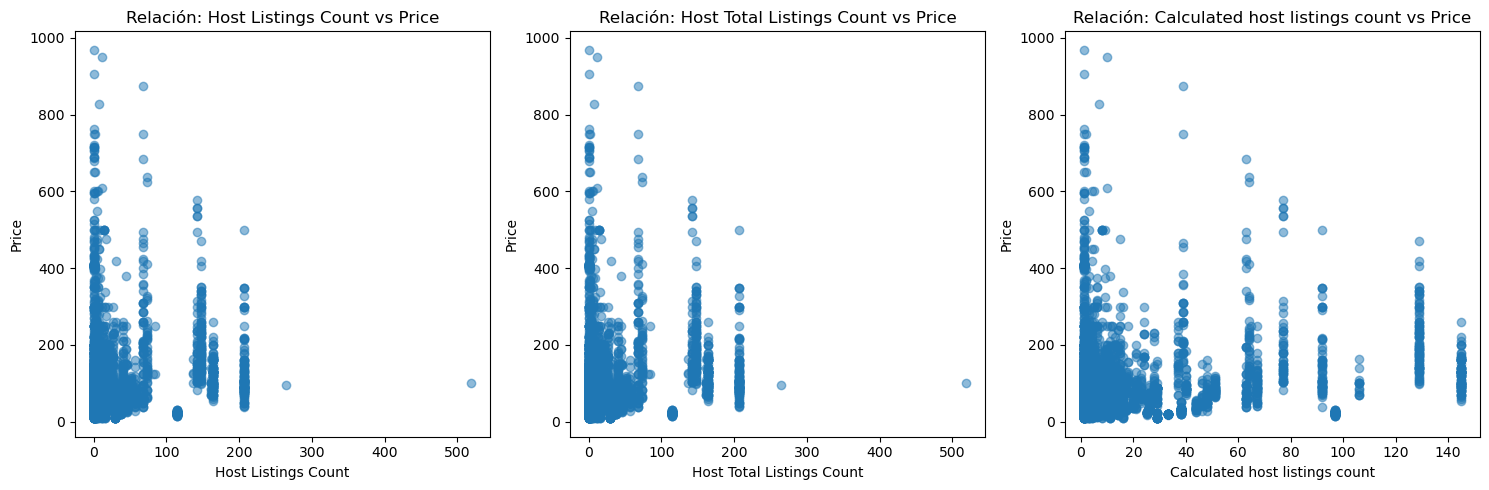

In [13]:
print(f"Valores faltantes por columna: \n {airbnb_train_data[['Host Listings Count', 'Host Total Listings Count', 'Calculated host listings count']].isnull().sum()}")

print("\n")

correlations = airbnb_train_data[['Host Listings Count', 'Host Total Listings Count', 'Calculated host listings count', 'Price']].corr()
print("Correlaciones con el precio:")
print(correlations['Price'])

# Visualizar relación con el precio
plt.figure(figsize=(15, 5))
for i, columna in enumerate(['Host Listings Count', 'Host Total Listings Count', 'Calculated host listings count'], 1):
    plt.subplot(1, 3, i)
    plt.scatter(airbnb_train_data[columna], airbnb_train_data['Price'], alpha=0.5)
    plt.title(f'Relación: {columna} vs Price')
    plt.xlabel(columna)
    plt.ylabel('Price')
plt.tight_layout()
plt.show()

### Analizar Country y Country Code

In [15]:
airbnb_train_data["Country Code"].unique(), airbnb_train_data["Country"].unique()

(array(['ES', 'FR', 'CA', 'DE', 'AU', 'GB', 'BE', 'US', 'IE', 'IT', 'AT',
        'NL', 'GR', 'CH', 'DK', 'It', 'CU', 'HK'], dtype=object),
 array(['Spain', 'France', 'Canada', 'Germany', 'Australia',
        'United Kingdom', 'Belgium', 'United States', 'Ireland', 'Italy',
        'Austria', 'Netherlands', 'Greece', 'Switzerland', 'Denmark', nan,
        'Cuba', 'Hong Kong'], dtype=object))

### [RUN] Eliminar columnas ronda 2

In [17]:
def eliminar_columnas_ronda_dos (dataset): 
    return dataset.drop(['Host Total Listings Count', 'Host Listings Count', 'Country Code'], axis=1)

print(f'Cantidad de columnas antes de borrar: {airbnb_train_data.shape[1]}') 
airbnb_train_data = eliminar_columnas_ronda_dos(airbnb_train_data)
print(f'Cantidad de columnas después de borrar: {airbnb_train_data.shape[1]}')

Cantidad de columnas antes de borrar: 45
Cantidad de columnas después de borrar: 42


### Conclusiones

* **ID, Listing Url, Scrape ID, Host ID, Host URL, Picture Url, Thumbnail Url, etc.**, son identificadores únicos o enlaces que no aportan información valiosa.
* **Last Scraped, Name, Summary, Description, Experiences Offered, Neighborhood Overview, Notes, Street, etc.**, contienen texto descriptivo que probablemente no tenga un impacto significativo en este caso.
* **First Review y Last Review**: contiene fechas de la primera y última reseña que no aportan valor significativo.
* **Calendar Updated y Calendar last Scraped**: proveen información de cuándo se actualizó o descargó el calendario de disponibilidad y esto no es relevante para el calculo del precio.
* **Latitud y Longitud:** Es redudante porque ya tenemos Geolocation.
* **Availability 30, Availability 60, Availability 90, Availability 365**: considero que no son relevantes para calcular el precio. Estan mas enfocadas a proveer informacion sobre disponibilidad en diferentes intervalos de tiempo.
* **Host Total Listings Count y Listings Count**: Tienen correlaciones similares con el precio y probablemente son redundantes comparada con Calculated Host Listings Count, pero está podria representar una versión derivada más precisa.
* **Country Code:** Procedemos a eliminar esta columa porque es redundante con Country y además contiene registros con codigo "It" y "IT" así que nos ahorramos ese procesamiento a mayusculas. 

### 2.2 Detectar valores faltantes y outliers

### Valores faltantes

In [20]:
airbnb_train_data.isnull().sum()

Host Acceptance Rate              10321
Street                                0
Neighbourhood Cleansed                0
City                                  4
State                               106
Zipcode                             347
Market                               39
Smart Location                        0
Country                               1
Property Type                         0
Room Type                             0
Accommodates                          0
Bathrooms                            38
Bedrooms                             20
Beds                                 34
Bed Type                              0
Amenities                           131
Square Feet                        9936
Price                                14
Weekly Price                       7833
Monthly Price                      7844
Security Deposit                   5899
Cleaning Fee                       4222
Guests Included                       0
Extra People                          0


In [21]:
def mostrar_porcentaje_valores_faltantes(dataset):
    porcentaje_valores_faltantes = dataset.isnull().mean() * 100
    print("Porcentaje de valores faltantes por columna:")
    print(porcentaje_valores_faltantes[porcentaje_valores_faltantes > 0].sort_values(ascending=False))

mostrar_porcentaje_valores_faltantes(airbnb_train_data)

Porcentaje de valores faltantes por columna:
Host Acceptance Rate              99.758361
Square Feet                       96.037116
Monthly Price                     75.816741
Weekly Price                      75.710419
Security Deposit                  57.017205
Cleaning Fee                      40.808042
Review Scores Value               22.994394
Review Scores Location            22.975063
Review Scores Checkin             22.955732
Review Scores Accuracy            22.907404
Review Scores Communication       22.868742
Review Scores Cleanliness         22.868742
Review Scores Rating              22.723758
Reviews per Month                 21.708873
Zipcode                            3.353953
Amenities                          1.266190
State                              1.024551
Market                             0.376957
Bathrooms                          0.367292
Beds                               0.328629
Bedrooms                           0.193311
Price                          

### [RUN] Se descartaran las columnas que tienen mas del 70% de valores faltantes:
- Host Acceptance Rate (99.76%)
- Square Feet (96.04%)
- Monthly Price (75.82%)
- Weekly Price (75.71%)

In [23]:
def eliminar_columnas_na (dataset): 
    return dataset.drop(['Host Acceptance Rate', 'Square Feet', 'Monthly Price', 'Weekly Price'], axis=1)

print(f'Cantidad de columnas antes de borrar: {airbnb_train_data.shape[1]}')
airbnb_train_data = eliminar_columnas_na(airbnb_train_data)
print(f'Cantidad de columnas después de borrar: {airbnb_train_data.shape[1]}')

mostrar_porcentaje_valores_faltantes(airbnb_train_data)

Cantidad de columnas antes de borrar: 42
Cantidad de columnas después de borrar: 38
Porcentaje de valores faltantes por columna:
Security Deposit                  57.017205
Cleaning Fee                      40.808042
Review Scores Value               22.994394
Review Scores Location            22.975063
Review Scores Checkin             22.955732
Review Scores Accuracy            22.907404
Review Scores Communication       22.868742
Review Scores Cleanliness         22.868742
Review Scores Rating              22.723758
Reviews per Month                 21.708873
Zipcode                            3.353953
Amenities                          1.266190
State                              1.024551
Market                             0.376957
Bathrooms                          0.367292
Beds                               0.328629
Bedrooms                           0.193311
Price                              0.135318
Calculated host listings count     0.038662
City                               

## Imputación de valores

In [26]:
airbnb_train_data[['Bathrooms', 'Beds', 'Bedrooms']].describe()

,Bathrooms,Beds,Bedrooms
count,10308.000000,10312.000000,10326.000000
mean,1.289726,2.053627,1.347376
std,0.668635,1.626308,0.904172
min,0.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000
50%,1.000000,2.000000,1.000000
75%,1.000000,2.000000,2.000000
max,8.000000,16.000000,10.000000


### [RUN] Imputare los valores nulos de tipo numerico con la mediana ya que no quiero que se vean afectado por los outliers.

In [27]:
def obtener_columnas_numericas():
    return airbnb_train_data.select_dtypes(include=['float64', 'int64']).columns

# Imputare los valores nulos de tipo numerico con la mediana
for columna in obtener_columnas_numericas():
    airbnb_train_data[columna] = airbnb_train_data[columna].fillna(airbnb_train_data[columna].median())

mostrar_porcentaje_valores_faltantes(airbnb_train_data)

Porcentaje de valores faltantes por columna:
Zipcode      3.353953
Amenities    1.266190
State        1.024551
Market       0.376957
City         0.038662
Country      0.009666
dtype: float64


In [28]:
airbnb_train_data[['Security Deposit']].describe()

,Security Deposit
count,10346.000000
mean,166.570365
std,78.180999
min,0.000000
25%,150.000000
50%,150.000000
75%,150.000000
max,990.000000


### [RUN] Imputare los valores nulos de Security Deposit con 0

In [30]:
airbnb_train_data['Security Deposit'] = airbnb_train_data['Security Deposit'].fillna(0)
mostrar_porcentaje_valores_faltantes(airbnb_train_data)

Porcentaje de valores faltantes por columna:
Zipcode      3.353953
Amenities    1.266190
State        1.024551
Market       0.376957
City         0.038662
Country      0.009666
dtype: float64


#### Validar porcentaje de filas restantes con valores nulos

In [32]:
columnas_con_valores_nulos = [
    'State', 'Zipcode', 'Market', 
    'City', 'Amenities', 'Country'
]
datase_filas_eliminadas = airbnb_train_data.dropna(subset=columnas_con_valores_nulos)
total_filas_antes = airbnb_train_data.shape[0]
total_filas_despues = datase_filas_eliminadas.shape[0]

print(
    f'Original: {total_filas_antes} // '
    f'Modificado: {total_filas_despues}\nDiferencia: {total_filas_antes - total_filas_despues}'
)
print(f'Variación: {((total_filas_antes - total_filas_despues)/total_filas_antes)*100:2f}%')

Original: 10346 // Modificado: 9734
Diferencia: 612
Variación: 5.915330%


### [RUN] Imputare los valores nulos de las filas restantes con la moda para no perder el 5% de la información.

In [34]:
airbnb_train_data[columnas_con_valores_nulos].mode()

,State,Zipcode,Market,City,Amenities,Country
0,Comunidad de Madrid,28012,Madrid,Madrid,"TV,Internet,Wireless Internet,Air conditioning...",Spain


In [35]:
# Rellenar valores nulos con la moda
for columna in columnas_con_valores_nulos:
    moda = airbnb_train_data[columna].mode()[0]
    airbnb_train_data[columna] = airbnb_train_data[columna].fillna(moda)

# Verificar si quedan valores nulos
print("Valores nulos después de la imputación:")
print(airbnb_train_data[columnas_con_valores_nulos].isnull().sum())

Valores nulos después de la imputación:
State        0
Zipcode      0
Market       0
City         0
Amenities    0
Country      0
dtype: int64


In [36]:
airbnb_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10346 entries, 0 to 10345
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Street                          10346 non-null  object 
 1   Neighbourhood Cleansed          10346 non-null  object 
 2   City                            10346 non-null  object 
 3   State                           10346 non-null  object 
 4   Zipcode                         10346 non-null  object 
 5   Market                          10346 non-null  object 
 6   Smart Location                  10346 non-null  object 
 7   Country                         10346 non-null  object 
 8   Property Type                   10346 non-null  object 
 9   Room Type                       10346 non-null  object 
 10  Accommodates                    10346 non-null  int64  
 11  Bathrooms                       10346 non-null  float64
 12  Bedrooms                        

In [37]:
airbnb_train_data.isnull().sum()

Street                            0
Neighbourhood Cleansed            0
City                              0
State                             0
Zipcode                           0
Market                            0
Smart Location                    0
Country                           0
Property Type                     0
Room Type                         0
Accommodates                      0
Bathrooms                         0
Bedrooms                          0
Beds                              0
Bed Type                          0
Amenities                         0
Price                             0
Security Deposit                  0
Cleaning Fee                      0
Guests Included                   0
Extra People                      0
Minimum Nights                    0
Maximum Nights                    0
Availability 30                   0
Availability 60                   0
Availability 90                   0
Availability 365                  0
Number of Reviews           

### Codificación de variables categóricas

In [79]:
columnas_tipo_objeto = airbnb_train_data.select_dtypes(include='object').columns

for columna in columnas_tipo_objeto:
    print(f"{columna}: {airbnb_train_data[columna].nunique() }")

# airbnb_train_data["Bed Type"].unique(), airbnb_train_data["Room Type"].unique(), airbnb_train_data["Property Type"].unique()
airbnb_train_data["State"].unique()

State: 89


array(['Community of Madrid', 'Comunidad de Madrid', 'Île-de-France',
       'Madrid', 'Catalunya', 'Illes Balears', '马德里', 'Islas Baleares',
       'ON', 'Berlin', 'NSW', 'Greater London', 'Bruxelles', 'madrid',
       'NY', 'Barcelona', 'Dublin', 'England', 'Balearic Islands', 'IDF',
       'Catalonia', 'County Dublin', 'TX', 'Veneto', 'Wien', 'CA',
       'Noord-Holland', 'Lazio', 'London', '马德里自治区', 'North Holland',
       'Genève', 'WA', 'Attica', 'Ile-de-France', 'Spain',
       'Communauté de Madrid', 'IL', 'Copenhagen', 'VIC',
       'Região Autônoma de Madrid', 'CT', '西班牙', 'Cataluña', 'Vienna',
       'Salerno Fisciano', 'España,Madrid', 'España', 'Berlín',
       'Brussels', 'PM', '馬德里自治區', 'New South Wales', 'Madrid capital',
       'Capital Region of Denmark', 'Inglaterra', 'DC', 'LA', 'BA',
       'Vlaanderen', 'londres', 'Ginebra', 'IB', 'MA', 'TN', 'Venezia',
       'Baleares', 'Alicante', 'CO', 'Brussels Hoofdstedelijk Gewest',
       'Mallorca', 'Québec', 'MADRID', 'W

In [63]:
# airbnb_train_data['Street'].head(5), airbnb_train_data['Market'].head(5)
airbnb_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10346 entries, 0 to 10345
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Street                          10346 non-null  object 
 1   Neighbourhood Cleansed          10346 non-null  object 
 2   City                            10346 non-null  object 
 3   State                           10346 non-null  object 
 4   Zipcode                         10346 non-null  object 
 5   Market                          10346 non-null  object 
 6   Smart Location                  10346 non-null  object 
 7   Country                         10346 non-null  object 
 8   Property Type                   10346 non-null  object 
 9   Room Type                       10346 non-null  object 
 10  Accommodates                    10346 non-null  int64  
 11  Bathrooms                       10346 non-null  float64
 12  Bedrooms                        

In [65]:
def eliminar_columnas_ronda_tres(dataset): 
    return dataset.drop(['Street', 'Geolocation', 'Smart Location', 'State'], axis=1)

print(f'Cantidad de registros: {airbnb_train_data.shape[0]}') 
print(f'Cantidad de columnas antes de borrar: {airbnb_train_data.shape[1]}') 
airbnb_train_data = eliminar_columnas_ronda_tres(airbnb_train_data)
print(f'Cantidad de columnas después de borrar: {airbnb_train_data.shape[1]}')

Cantidad de registros: 10346
Cantidad de columnas antes de borrar: 38
Cantidad de columnas después de borrar: 35


### [RUN] Codificando variables

In [67]:
from sklearn.preprocessing import LabelEncoder

def one_hot_encode(dataset, columnas):
    """Aplica One-Hot Encoding a las columnas seleccionadas."""
    return pd.get_dummies(dataset, columns=columnas, drop_first=True)

def label_encode(dataset, columnas):
    """Aplica Label Encoding a las columnas seleccionadas."""
    for columna in columnas:
        le = LabelEncoder()
        dataset[columna] = le.fit_transform(dataset[columna])
    return dataset

def procesar_amenidades(dataset, columna):
    """Crea una nueva columna con el conteo de amenidades."""
    dataset['Amenities_Count'] = dataset[columna].apply(lambda x: len(x.split(',')))
    return dataset

# airbnb_encoded = airbnb_train_data.copy()

# # Aplicar One-hot
# airbnb_encoded = one_hot_encode(airbnb_encoded, ['Room Type', 'Property Type', 'Bed Type', 'Market'])

# # Aplicar Label Encoding
# airbnb_encoded = label_encode(airbnb_encoded, ['Neighbourhood Cleansed', 'Zipcode'])

# # Aplicar conteo de características a Amenities
# airbnb_encoded = procesar_amenidades(airbnb_encoded, 'Amenities')

# # Eliminar columna Amenities para evitar redundancia
# airbnb_encoded.drop(columns=["Amenities"], inplace=True)

# ------- DATASET ORIGINAL ------ #

# Aplicar One-hot
airbnb_train_data = one_hot_encode(airbnb_train_data, ['Room Type', 'Property Type', 'Bed Type', 'Market', 'City'])

# Aplicar Label Encoding
airbnb_train_data = label_encode(airbnb_train_data, ['Neighbourhood Cleansed', 'Zipcode', 'Country'])

# Aplicar conteo de características a Amenities
airbnb_train_data = procesar_amenidades(airbnb_train_data, 'Amenities')

# Eliminar columna Amenities para evitar redundancia
airbnb_train_data.drop(columns=["Amenities"], inplace=True)

In [92]:
airbnb_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10346 entries, 0 to 10345
Columns: 303 entries, Neighbourhood Cleansed to Amenities_Count
dtypes: bool(274), float64(15), int32(3), int64(11)
memory usage: 4.9 MB


## Conclusiones
* Ninguna variable categórica parece tener un orden logico así que concluyo que todas son nominales.
* Street y Geolocation: procedemos a descartarlas porque tienen un numero excesivo de categorías. No son utiles para predecir el precio ya que no se observan patrones repetibles.
* Se procede a eliminar la columna State porque tiene cierta relación con los valores en City y además contiene mucha inconsistencias en el contenido.
* Se procede a eliminar la columna Smart Location porque considero que trabajar con City y Country por separado es mas facil de manejar y procesar.
* Amenities tiene un número muy alto de valores unicos así que procederemos a crear una variable derivada para contar la cantidad de amenidades. Luego analizar si esto es util para predecir el precio.
* Room Type, Property Type y Bed Type pueden tener un impacto alto en el precio.

### Identificar outliers en columnas numéricas

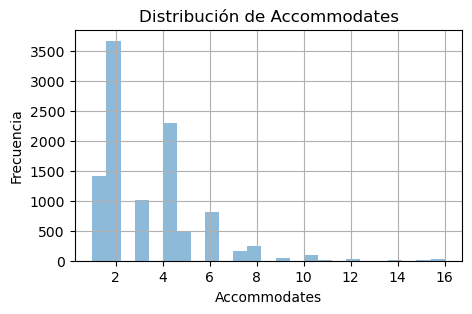

In [94]:
def grafica_frecuencia_por_columnas(activarBreak = True):
    for columna in obtener_columnas_numericas():
        plt.figure(figsize=(5, 3))  # Ajusta el tamaño de cada figura individual
        airbnb_train_data[columna].plot.hist(alpha=0.5, bins=25, grid=True)
        plt.xlabel(columna)
        plt.ylabel("Frecuencia")
        plt.title(f"Distribución de {columna}")
        plt.show()
        
        if activarBreak: 
            break

grafica_frecuencia_por_columnas(activarBreak = True)

In [98]:
# Cantidad de registros con 0 baños
print(f"0 Baños: {airbnb_train_data[(airbnb_train_data['Bathrooms'] == 0)].shape[0]}")

# Cantidad de registros con 0 Dormitorios
print(f"0 Dormitorios: {airbnb_train_data[(airbnb_train_data['Bedrooms'] == 0)].shape[0]}")

# Cantidad de registros con 0 Camas
print(f"0 Camas: {airbnb_train_data[(airbnb_train_data['Beds'] == 0)].shape[0]}")

# Cantidad de registros con 0 Precio
print(f"0 Precio: {airbnb_train_data[(airbnb_train_data['Price'] == 0)].shape[0]}")

filtro_0_dormitorios = airbnb_train_data[(airbnb_train_data['Bedrooms'] == 0)][['Bathrooms', 'Beds', 'Price']]
filtro_ordenado = filtro_0_dormitorios.sort_values(by='Bathrooms', ascending=True)
filtro_ordenado

0 Baños: 44
0 Dormitorios: 707
0 Camas: 0
0 Precio: 0


,Bathrooms,Beds,Price
315,0.5,1.0,56.0
189,0.5,2.0,30.0
81,1.0,2.0,65.0
6976,1.0,1.0,45.0
6991,1.0,2.0,69.0
...,...,...,...
7280,2.0,1.0,18.0
9740,2.0,2.0,80.0
3222,2.0,3.0,133.0
8814,2.0,1.0,40.0


In [100]:
# print(airbnb_train_data['Minimum Nights'].describe())
# print(airbnb_train_data['Maximum Nights'].describe())

# print(airbnb_train_data[airbnb_train_data['Minimum Nights'] > 30][['Minimum Nights']].unique())
# airbnb_train_data['Minimum Nights'].unique()

# valores_frecuencia_ordenados = airbnb_train_data['Minimum Nights'].value_counts().sort_index()
# valores_frecuencia_ordenados

percentil_99_min = airbnb_train_data['Minimum Nights'].quantile(0.99)
print("Percentil 99 para Minimum Nights:", percentil_99_min)

percentil_99_max = airbnb_train_data['Maximum Nights'].quantile(0.99)
print("Percentil 99 para Maximum Nights:", percentil_99_max)

print(f"Outliers en Minimum Nights: {airbnb_train_data[airbnb_train_data['Minimum Nights'] > 30].shape[0]}")
print(f"Outliers en Maximum Nights: {airbnb_train_data[airbnb_train_data['Maximum Nights'] > 1130].shape[0]}")

Percentil 99 para Minimum Nights: 28.0
Percentil 99 para Maximum Nights: 1125.0
Outliers en Minimum Nights: 33
Outliers en Maximum Nights: 50


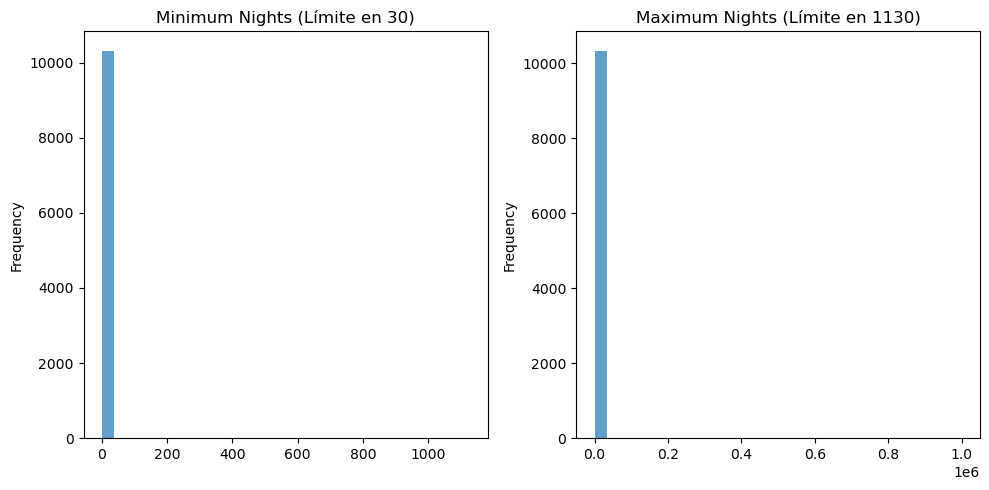

In [102]:
def grafico_minimo_maximo_noches():
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    airbnb_train_data['Minimum Nights'].plot.hist(bins=30, alpha=0.7)
    plt.title("Minimum Nights (Límite en 30)")
    
    plt.subplot(1, 2, 2)
    airbnb_train_data['Maximum Nights'].plot.hist(bins=30, alpha=0.7)
    plt.title("Maximum Nights (Límite en 1130)")
    
    plt.tight_layout()
    plt.show()

grafico_minimo_maximo_noches()

### [RUN] Ajustar minimo y maximo de noches con los maximos para evitar perder información

Minimum: 30
Maximum: 1130


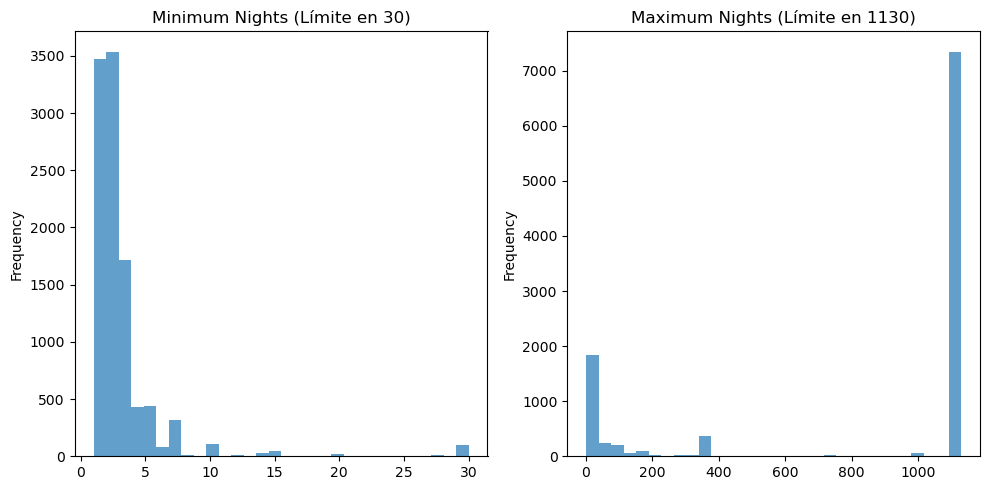

In [104]:
airbnb_train_data['Minimum Nights'] = airbnb_train_data['Minimum Nights'].clip(upper=30)
airbnb_train_data['Maximum Nights'] = airbnb_train_data['Maximum Nights'].clip(upper=1130)

print(f"Minimum: {airbnb_train_data['Minimum Nights'].max()}")
print(f"Maximum: {airbnb_train_data['Maximum Nights'].max()}")

grafico_minimo_maximo_noches()

### [RUN] Eliminar registros con 0 baño

In [106]:
airbnb_train_data = airbnb_train_data[airbnb_train_data['Bathrooms'] != 0]

# Cantidad de registros con 0 baños
print(f"0 Baños: {airbnb_train_data[(airbnb_train_data['Bathrooms'] == 0)].shape[0]}")

0 Baños: 0


## Conclusiones

* Se descartaron los 44 registros que tienen 0 baño.
* Se mantienen los 707 registros que tienen 0 Dormitorio porque pueden ser apartaestudios.
* La gran mayoría de los valores de Minimum Nights están concentrados en valores pequeños con un percentil 99 de 28 noches. Así que se ajustaron los registros con más de 30 días para que tomen el valor maximo y evitar perder información. En este  caso, cualquier valor superior a 30 será reemplazado por 30.
* Se hizo algo similar con el Maximum Nights. Cualquier valor superior a 1.130 será reemplazado por 1130.

### Relación entre `Price` y las columnas numéricas

C:\Users\ASUS\anaconda3\Lib\site-packages\pandas\plotting\_matplotlib\core.py:580: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


<Figure size 1500x500 with 0 Axes>

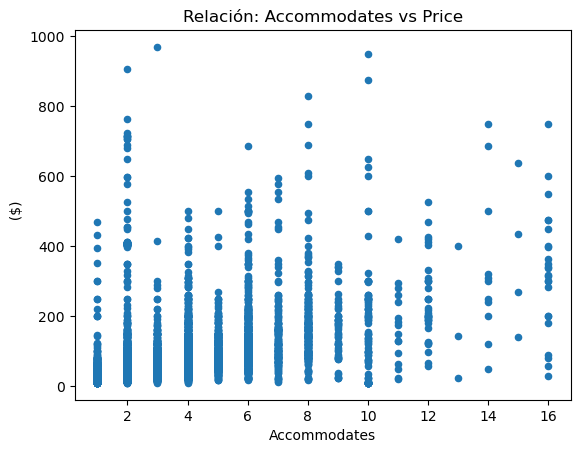

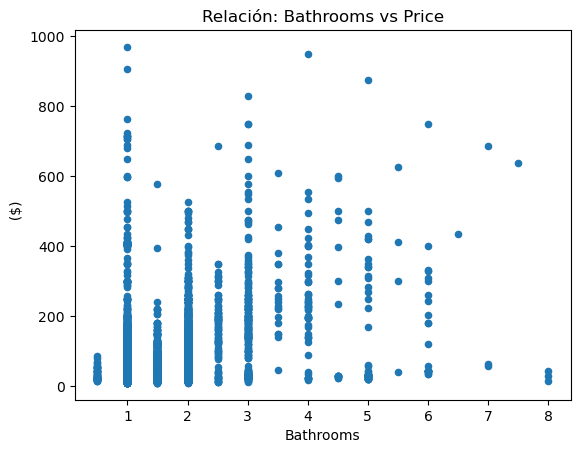

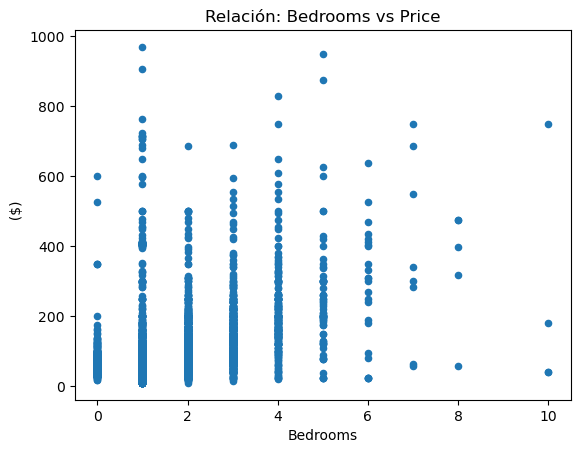

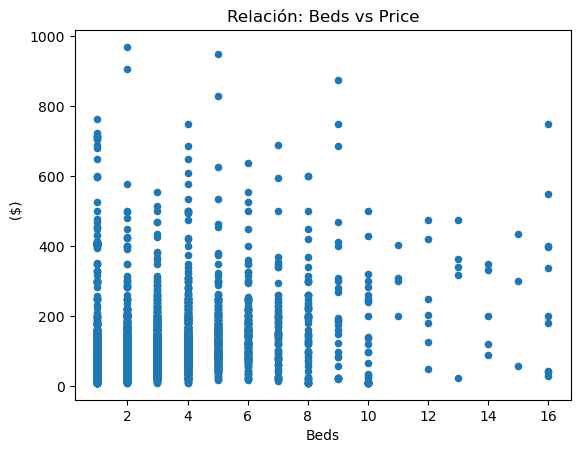

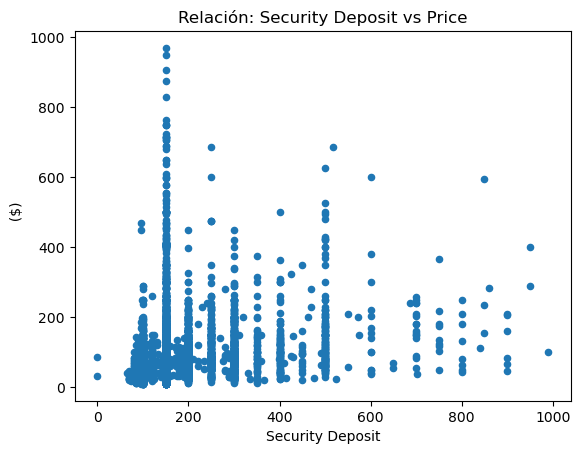

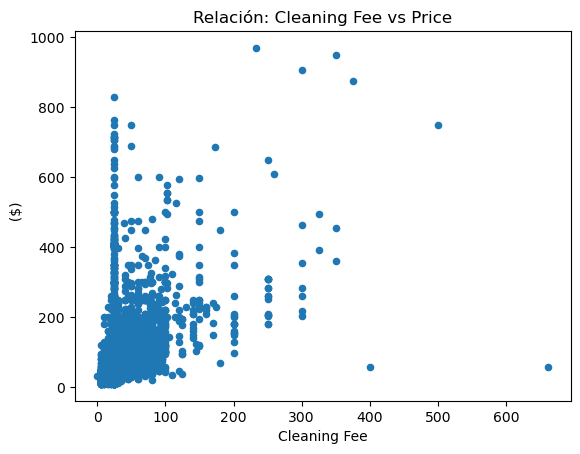

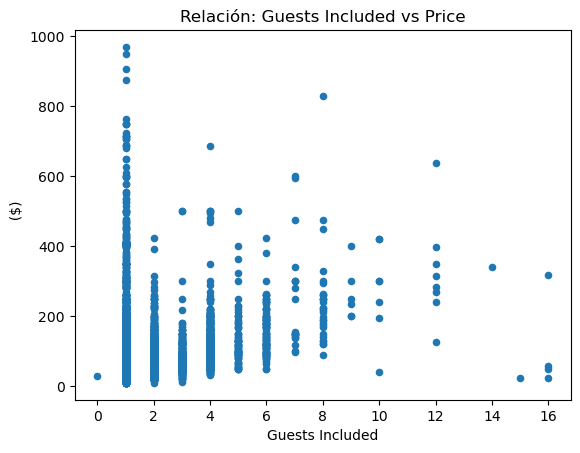

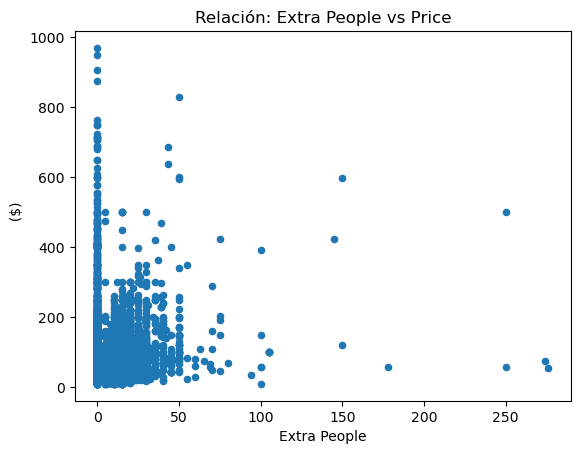

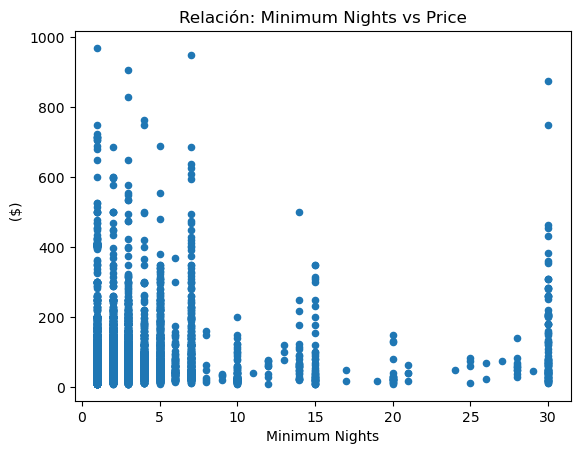

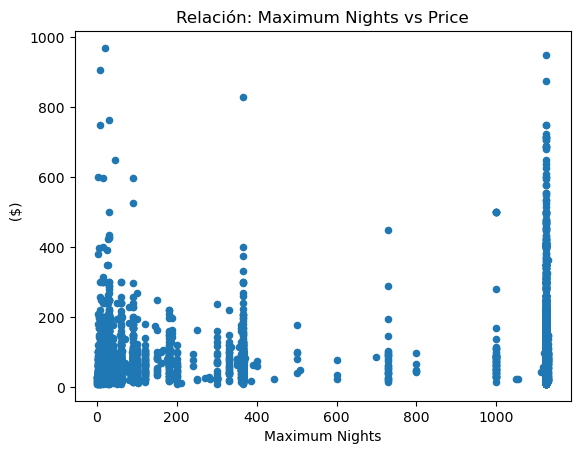

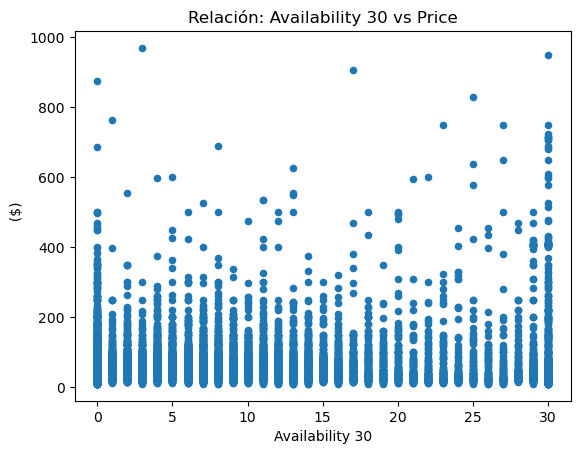

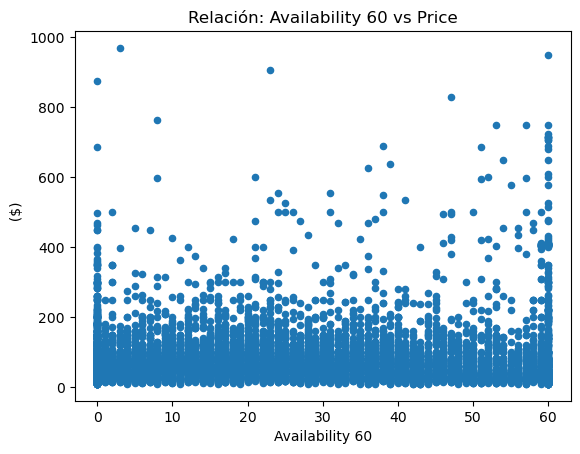

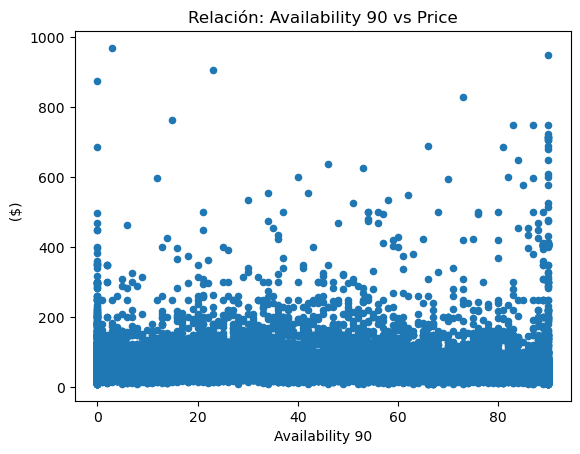

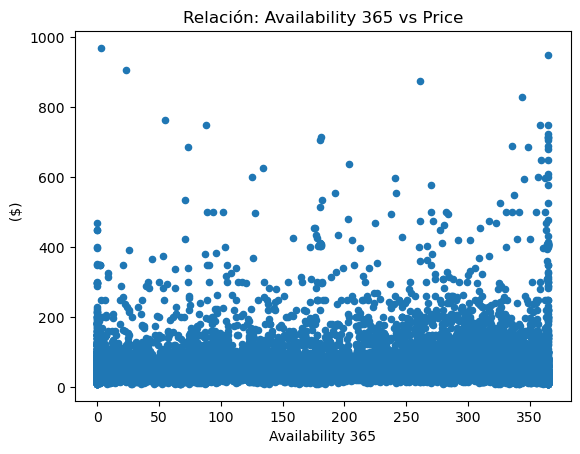

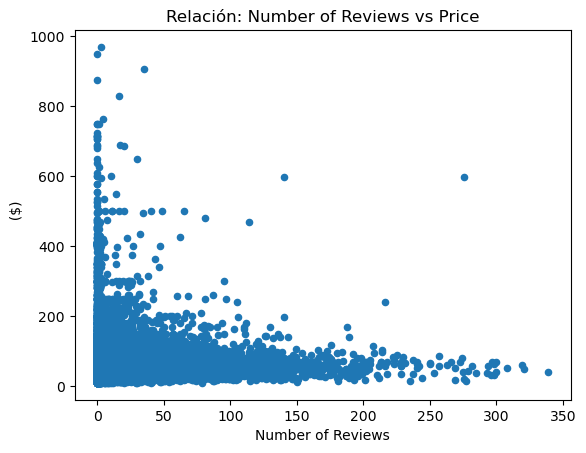

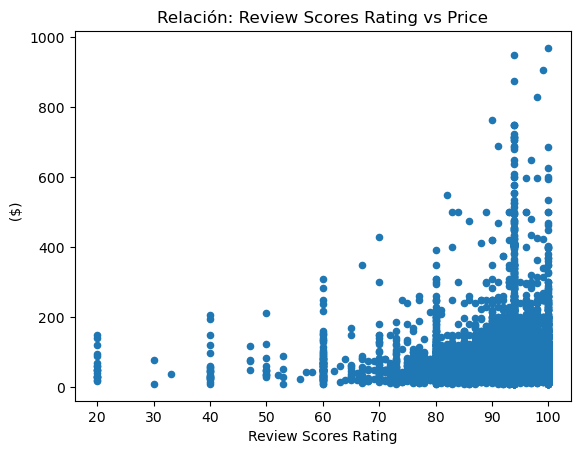

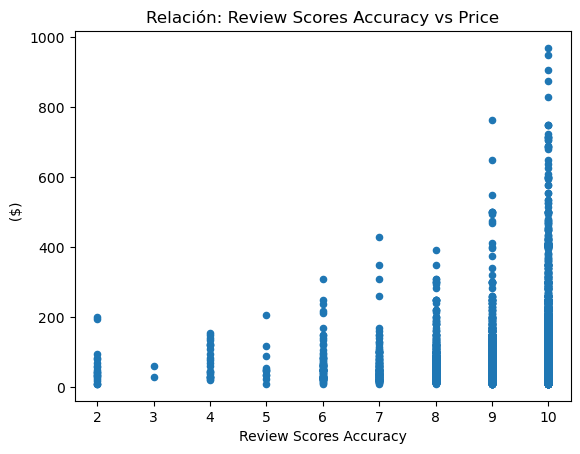

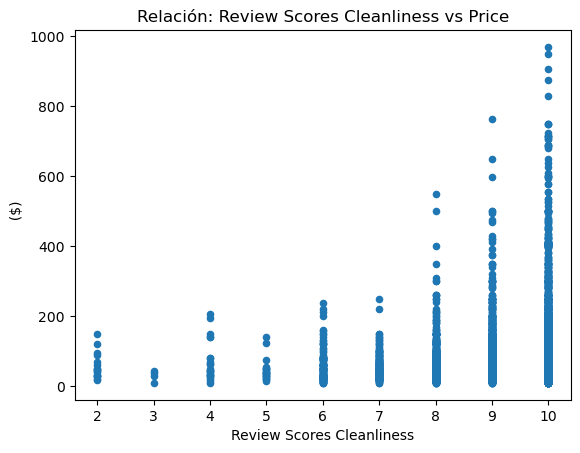

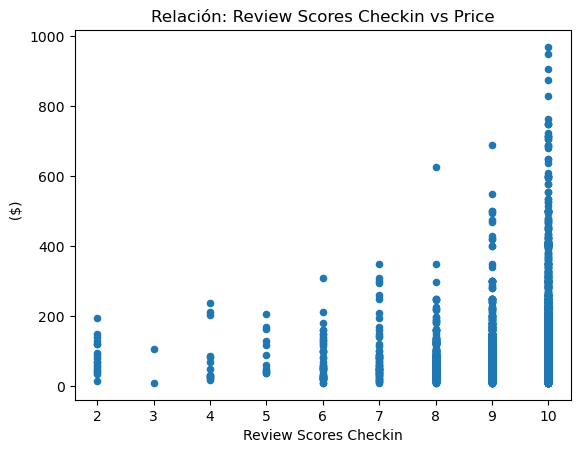

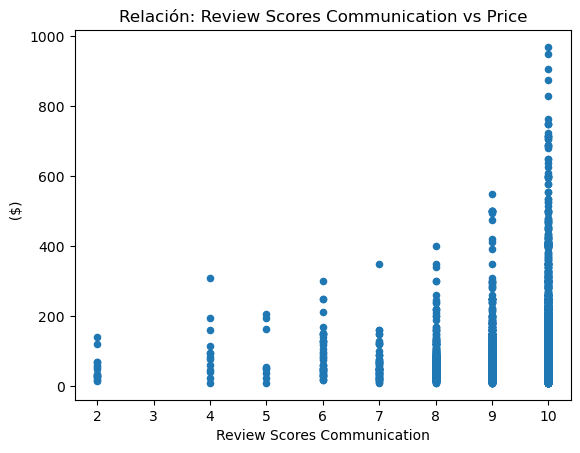

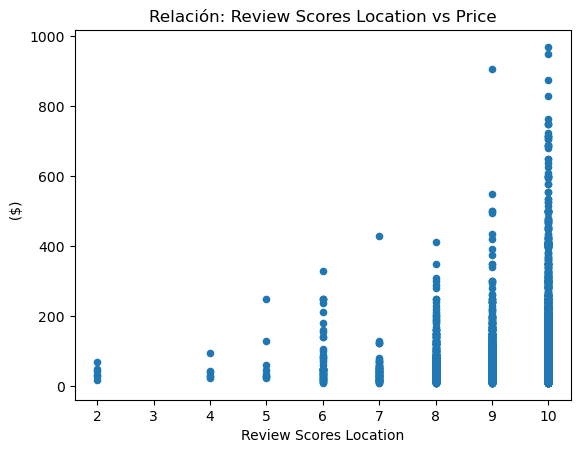

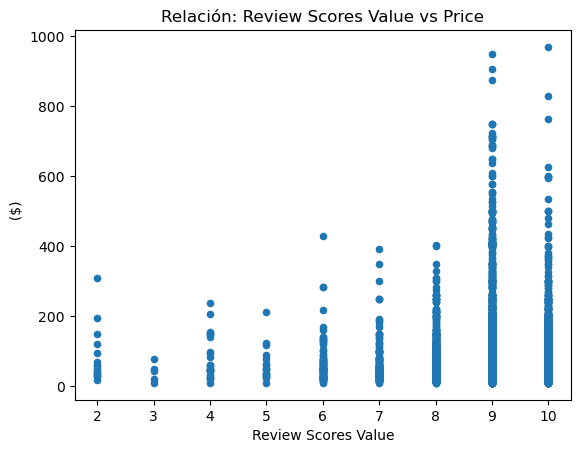

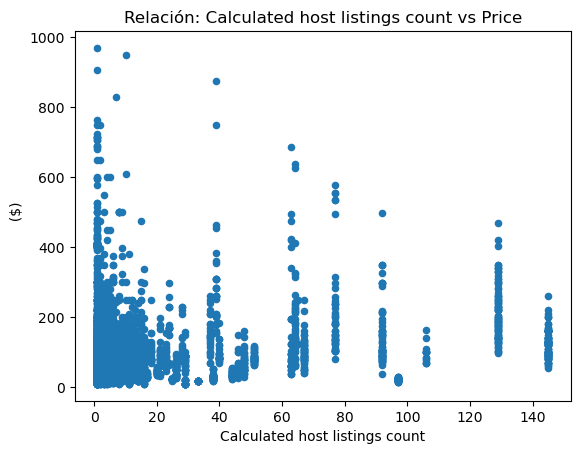

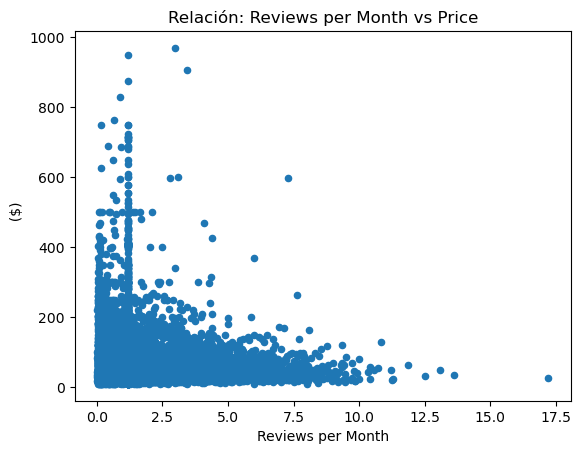

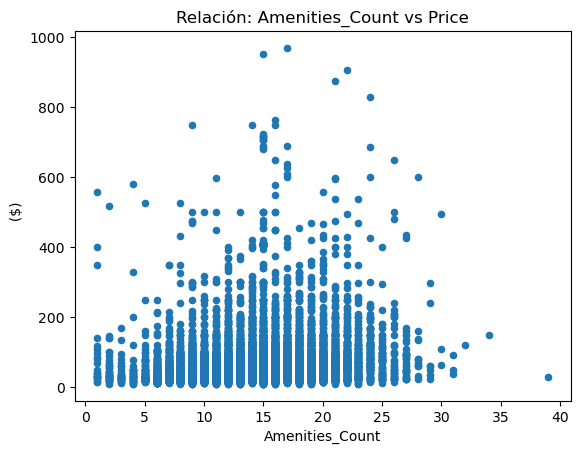

In [114]:
plt.figure(figsize=(15, 5))
for i, columna in enumerate(obtener_columnas_numericas(), 1):
    if columna != 'Price':
        airbnb_train_data.plot(kind = 'scatter',x=columna,y = 'Price')
        plt.title(f"Relación: {columna} vs Price")
        plt.xlabel(columna)
        plt.ylabel('  ($)')
        # break
plt.show()

### Conclusiones
* Existe una relación positiva entre Accommodates y Price, alojamientos con mayor capacidad tienden a ser más caros.
    * En alojamientos con mayor capacidad (más de 8 personas) el precio tiende a ser consistentemente más alto.
* Tambien hay una relación positiva entre Bathrooms y Price, más baños generalmente estan asociados con alojamientos más caros.
    * El precio generalmente aumenta con el número de baños pero hay menos alojamientos con más de 3 baños.
    * Algunos alojamientos con 2-3 baños tienen precios muy altos, lo mas probablemente es que sea debido a factores externos.
* Los precios más altos están asociados con alojamientos que tienen puntuaciones de limpieza de 9 o 10.
* No veo relación fuerte de los campos Review Scores Communication y Review Scores Checkin con el precio.

### [RUN] Eliminar columnas redudantes ronda 4

In [116]:
def eliminar_columnas_ronda_cuatro(dataset): 
    return dataset.drop(['Review Scores Communication', 'Review Scores Checkin', 'Availability 30', 'Availability 60', 'Availability 90'], axis=1)

print(f'Cantidad de registros: {airbnb_train_data.shape[0]}') 
print(f'Cantidad de columnas antes de borrar: {airbnb_train_data.shape[1]}') 
airbnb_train_data = eliminar_columnas_ronda_cuatro(airbnb_train_data)
print(f'Cantidad de columnas después de borrar: {airbnb_train_data.shape[1]}')

Cantidad de registros: 10302
Cantidad de columnas antes de borrar: 303
Cantidad de columnas después de borrar: 298


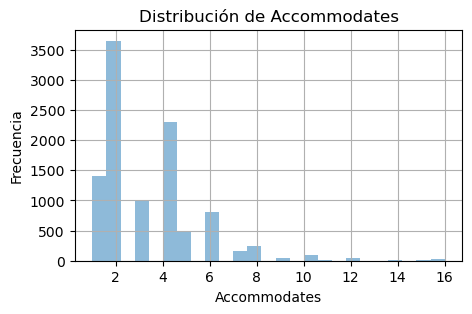

In [122]:
grafica_frecuencia_por_columnas(activarBreak = True)

In [126]:
# Calcular la matriz de correlación
airbnb_train_data.corr()

,Neighbourhood Cleansed,Zipcode,Country,Accommodates,Bathrooms,Bedrooms,Beds,Price,Security Deposit,Cleaning Fee,...,City_West Hollywood,City_Westmount,City_Wien,City_Windsor,City_Woolloomooloo,City_madrid,City_villa verde bajo,City_馬德里,City_马德里,Amenities_Count
Neighbourhood Cleansed,1.000000,-0.103879,-0.035499,0.051554,0.012995,0.021997,0.018597,0.055097,0.027728,0.022221,...,0.006198,0.016003,0.006544,0.005773,0.011696,0.008722,0.000210,-0.001987,-0.011525,0.012630
Zipcode,-0.103879,1.000000,0.072937,-0.225074,-0.195857,-0.223805,-0.209435,-0.190032,-0.018234,-0.115195,...,0.029437,0.031842,-0.076783,0.013269,-0.005110,0.008020,0.002629,0.001939,0.028016,0.023048
Country,-0.035499,0.072937,1.000000,0.006644,0.012387,-0.003622,0.006591,-0.046710,-0.040908,-0.031553,...,0.032267,-0.071848,-0.366914,-0.093693,-0.093693,0.002376,0.000970,0.001372,0.006297,0.032480
Accommodates,0.051554,-0.225074,0.006644,1.000000,0.420975,0.723655,0.833902,0.519314,0.187452,0.307155,...,-0.005287,0.003313,0.042896,-0.010789,-0.006089,0.004277,-0.006089,0.011333,-0.037357,0.194493
Bathrooms,0.012995,-0.195857,0.012387,0.420975,1.000000,0.517654,0.470380,0.360887,0.153039,0.231931,...,-0.006176,-0.004367,0.005971,-0.004367,-0.004367,0.013549,0.003056,0.020069,-0.026063,0.123313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
City_madrid,0.008722,0.008020,0.002376,0.004277,0.013549,0.008556,0.004144,-0.009681,-0.005128,-0.005888,...,-0.000336,-0.000238,-0.001010,-0.000238,-0.000238,1.000000,-0.000238,-0.000336,-0.001545,-0.018144
City_villa verde bajo,0.000210,0.002629,0.000970,-0.006089,0.003056,-0.003798,-0.000332,-0.008483,-0.002093,-0.001735,...,-0.000137,-0.000097,-0.000412,-0.000097,-0.000097,-0.000238,1.000000,-0.000137,-0.000630,-0.009546
City_馬德里,-0.001987,0.001939,0.001372,0.011333,0.020069,0.017827,0.003823,0.022325,-0.002960,-0.002454,...,-0.000194,-0.000137,-0.000583,-0.000137,-0.000137,-0.000336,-0.000137,1.000000,-0.000892,-0.001389
City_马德里,-0.011525,0.028016,0.006297,-0.037357,-0.026063,-0.022972,-0.038765,0.333879,-0.013590,-0.011267,...,-0.000892,-0.000630,-0.002677,-0.000630,-0.000630,-0.001545,-0.000630,-0.000892,1.000000,0.003551


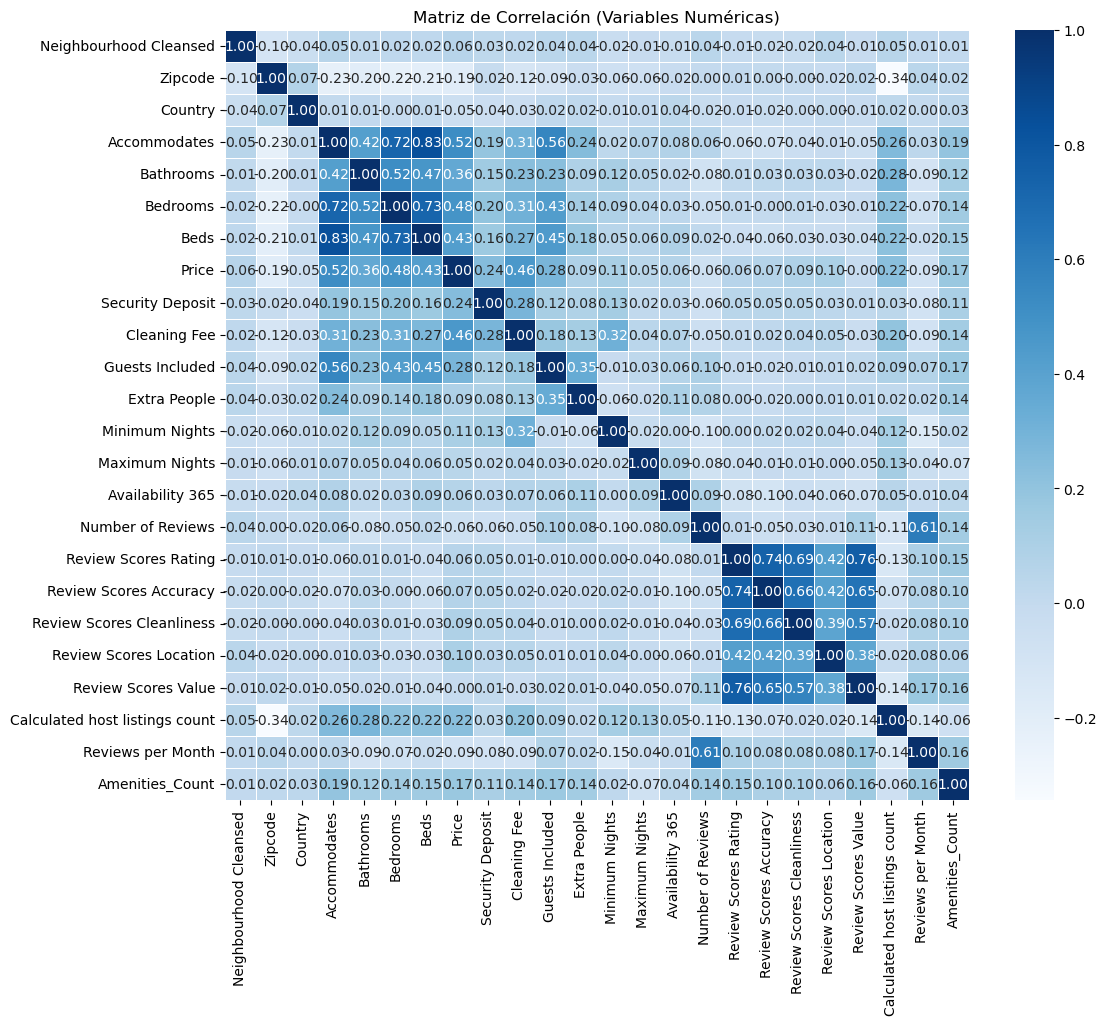

In [154]:
# import seaborn as sns

# # Compute the correlation matrix
# corr = airbnb_train_data.corr()

# plt.figure(figsize=(12, 10))  # Puedes ajustar el tamaño de la figura si es necesario
# sns.heatmap(corr, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)

# # Mostrar el gráfico
# plt.title("Matriz de Correlación")
# plt.show()

def dibujar_matriz_correlacion_numerica(df):
    df_numerico = df.select_dtypes(include=['float64', 'int32', 'int64'])
    matriz_correlacion = df_numerico.corr()

    plt.figure(figsize=(12, 10))
    sns.heatmap(matriz_correlacion, annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)
    
    plt.title("Matriz de Correlación (Variables Numéricas)")
    plt.show()

def dibujar_matriz_correlacion_objetivo(df, columna_objetivo):
    if columna_objetivo not in df.columns:
        print(f"La columna '{columna_objetivo}' no se encuentra en el DataFrame.")
        return

    correlacion_con_objetivo = df.corr()[[columna_objetivo]]
    
    plt.figure(figsize=(8, 6)) 
    sns.heatmap(correlacion_con_objetivo.sort_values(by=columna_objetivo, ascending=False),
                annot=True, cmap='Blues', fmt='.2f', linewidths=0.5)

    plt.title(f"Matriz de Correlación con la variable objetivo: {columna_objetivo}")
    plt.show()

dibujar_matriz_correlacion_numerica(airbnb_train_data)
# dibujar_matriz_correlacion_objetivo(airbnb_train_data, 'Price')

## Variables a descartar 
* Security Deposit: no tiene una relación fuerte con el precio.
* Cleaning Fee: no esta directamente relacionada con el precio.
* Extra People: tampoco influye en el precio.
* La disponibilidad continua tampoco tiene un impacto significativo en el precio.
* Amenities Count muestra correlación baja y algo dispersa así que considero que tampoco es importante.

## Variables que mas influyen por su alta relación con el precio
* Accommodates, Number of Reviews, y Review Scores Rating.

# 4. Modelado, cross-validation y estudio de resultados en train y test

### Preprocesamiento

In [187]:
from sklearn.preprocessing import LabelEncoder

def one_hot_encode(dataset, columnas):
    """Aplica One-Hot Encoding a las columnas seleccionadas."""
    return pd.get_dummies(dataset, columns=columnas, drop_first=True)

def label_encode(dataset, columnas):
    """Aplica Label Encoding a las columnas seleccionadas."""
    for columna in columnas:
        le = LabelEncoder()
        dataset[columna] = le.fit_transform(dataset[columna])
    return dataset

def procesar_amenidades(dataset, columna):
    """Crea una nueva columna con el conteo de amenidades."""
    dataset['Amenities_Count'] = dataset[columna].apply(lambda x: len(x.split(',')))
    return dataset

def pre_procesamiento_final(dataset): 
    # Hacer una copia del dataset
    dataset = dataset.copy()

    # Eliminar columnas irrelevantes
    dataset.drop(['Access', 'Calendar last Scraped', 'Calendar Updated', 'Cancellation Policy', 
                  'Description', 'Experiences Offered', 'Features', 'Host Since', 'First Review', 
                  'Latitude', 'Longitude', 'Has Availability', 'Host About', 'Host ID', 
                  'Host Location', 'Host Name', 'Host Neighbourhood', 'Host Picture Url', 
                  'Host Response Rate', 'Host Response Time', 'Host Thumbnail Url', 'Host URL', 
                  'Host Verifications', 'House Rules', 'ID', 'Interaction', 'Jurisdiction Names', 
                  'Last Review', 'Last Scraped', 'License', 'Listing Url', 'Medium Url', 'Name', 
                  'Neighborhood Overview', 'Neighbourhood Group Cleansed', 'Neighbourhood', 'Notes', 
                  'Picture Url', 'Scrape ID', 'Space', 'Summary', 'Thumbnail Url', 'Transit', 
                  'XL Picture Url', 'Host Total Listings Count', 'Host Listings Count', 'Country Code', 
                  'Street', 'Geolocation', 'Smart Location', 'State', 'Review Scores Communication', 
                  'Review Scores Checkin', 'Availability 30', 'Availability 60', 'Availability 90'], axis=1, inplace=True)

    # Eliminar columnas con muchos valores nulos
    dataset.drop(['Host Acceptance Rate', 'Square Feet', 'Monthly Price', 'Weekly Price'], axis=1, inplace=True)

    # Imputar valores nulos numéricos con la mediana
    for columna in dataset.select_dtypes(include=['float64', 'int64']).columns:
        dataset[columna] = dataset[columna].fillna(dataset[columna].median())

    # Imputar valores nulos específicos
    dataset['Security Deposit'] = dataset['Security Deposit'].fillna(0)

    # Imputar valores nulos categóricos con la moda
    columnas_con_valores_nulos = ['Zipcode', 'Market', 'City', 'Country']
    for columna in columnas_con_valores_nulos:
        dataset[columna] = dataset[columna].fillna(dataset[columna].mode()[0])

    # One-hot Encoding
    dataset = one_hot_encode(dataset, ['Room Type', 'Property Type', 'Bed Type', 'Market', 'City'])

    # Label Encoding
    dataset = label_encode(dataset, ['Neighbourhood Cleansed', 'Zipcode', 'Country'])

    # Procesar Amenities
    # dataset = procesar_amenidades(dataset, 'Amenities')
    # dataset.drop(columns=["Amenities"], inplace=True)

    # Ajustar valores extremos de Minimum y Maximum Nights
    dataset['Minimum Nights'] = dataset['Minimum Nights'].clip(upper=30)
    dataset['Maximum Nights'] = dataset['Maximum Nights'].clip(upper=1130)

    # Eliminar registros con 0 baños
    dataset['Bathrooms'] = dataset['Bathrooms'].fillna(dataset['Bathrooms'].median())
    dataset = dataset[dataset['Bathrooms'] != 0]

    return dataset


### APLICAR A TRAIN

In [191]:
# Cargar el dataset de train
airbnb_train_data = pd.read_csv('./airbnb-listings_train.csv', sep=';', decimal='.')
result = pre_procesamiento_final(airbnb_train_data)
result.info()
# airbnb_train_data = pre_procesamiento_final(airbnb_train_data, airbnb_train_data)

<class 'pandas.core.frame.DataFrame'>
Index: 10302 entries, 0 to 10345
Columns: 298 entries, Neighbourhood Cleansed to City_马德里
dtypes: bool(274), float64(13), int32(3), int64(7), object(1)
memory usage: 4.5+ MB


### APLICAR A TEST

In [ ]:
# Cargar el dataset de train
airbnb_train_test = pd.read_csv('./airbnb-listings_test.csv', sep=';', decimal='.')
# airbnb_train_data = pre_procesamiento_final(airbnb_train_test, airbnb_train_data)